In [1]:
#correlation_heatmap   22.04.13
#draw heatmap of correlation - clinical covariates

library(gplots)
library(pheatmap)
library(RColorBrewer)
library(compositions)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    anova, cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [2]:
get_heatmap_results <- function(data_file, bin_file, defined_title){
    
    data_df <- read.csv(data_file, sep="\t", header=TRUE, row.names=1)
    data_df <- as.data.frame(data_df)
    
    bin_df <- read.csv(bin_file, sep="\t", header=TRUE, row.names=1)
    bin_df <- as.data.frame(bin_df)
    
    df_size <- dim(data_df)
    df_row_length <- df_size[1]
    df_col_length <- df_size[2]

    colorpal <- brewer.pal(11,"RdBu")
    colorpal <- c(colorpal[1:6], "#FFFFFF", colorpal[7:11])
    colorpal <- rev(colorpal)
    
    heatmap_results <- pheatmap(data_df, show_rownames=TRUE, show_colnames=TRUE, 
                                color = colorpal, fontsize_row = 5,
                                cluster_cols=TRUE, legend_labels=FALSE, 
                                main=defined_title, 
                                display_numbers = bin_df)

    return (heatmap_results)
    
}

pdf 
  2

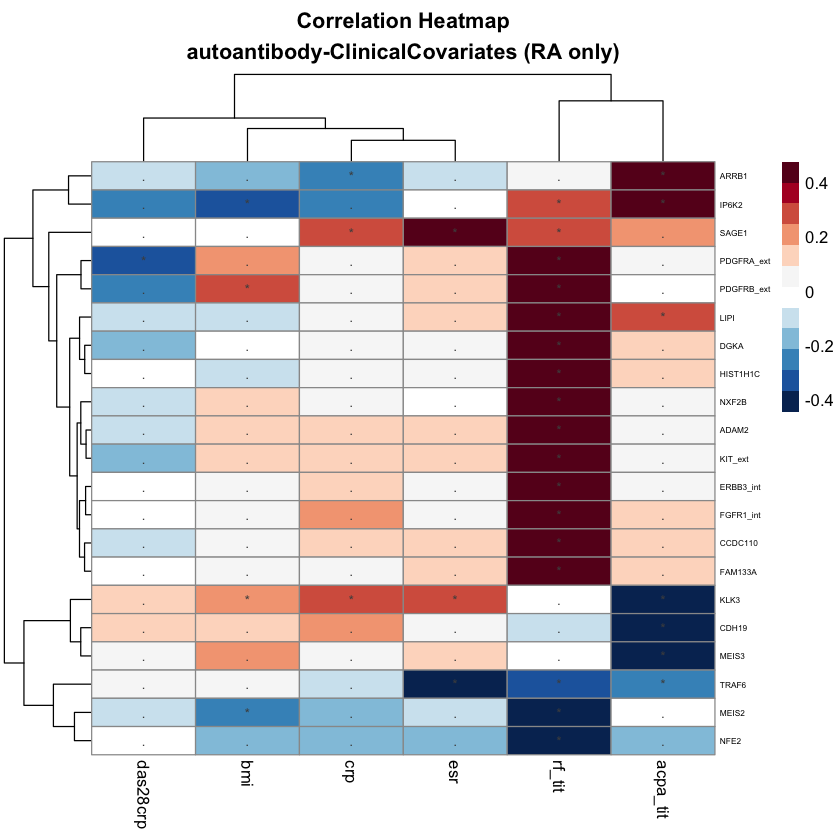

In [3]:
data_file = '../../../analysis/statistics/autoantibody_correlation/autoantibody_patient_info_correlation.filtered.main.tsv'
bin_file = '../../../analysis/statistics/autoantibody_correlation/autoantibody_patient_info_correlation.filtered.bin.tsv'

heatmap_results <- get_heatmap_results(data_file, bin_file, "Correlation Heatmap\nautoantibody-ClinicalCovariates (RA only)")

output_pdf_label = '../../../analysis/statistics/autoantibody_correlation/autoantibody_patient_info_correlation.filtered.pdf'
pdf(output_pdf_label)
heatmap_results
dev.off()